In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_51380_G')

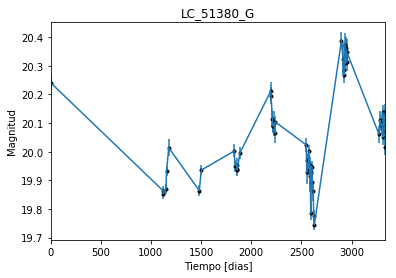

In [2]:
data = np.genfromtxt('LC_51380_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_51380_G')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

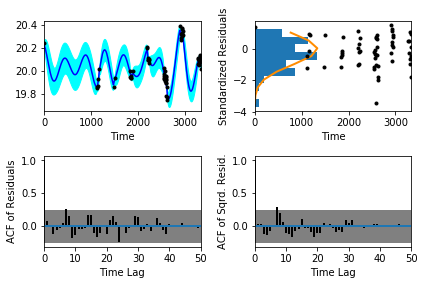

In [5]:
sample.assess_fit()

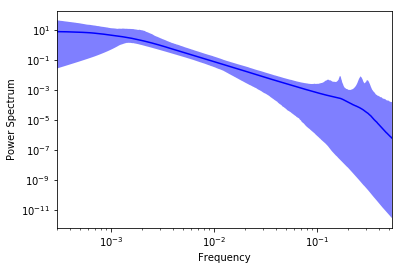

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_51380_G')

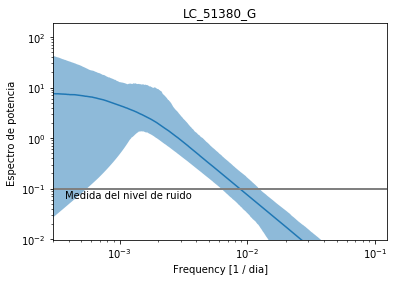

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_51380_G')

Text(0.5,1,'Prediccion , valor esperado LC_51380_G')

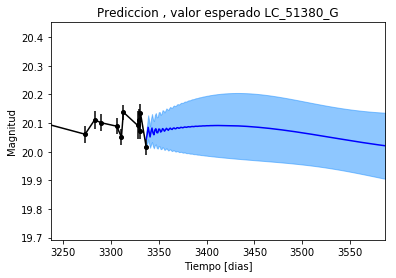

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_51380_G')

Text(0.5,1,'Prediccion, Caminos simulados LC_51380_G')

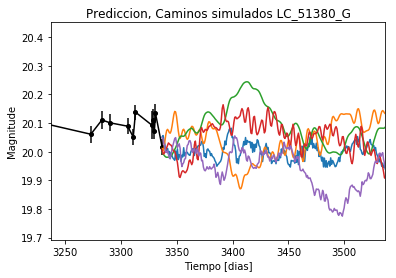

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_51380_G')

Text(0.5,1,'LC_51380_G')

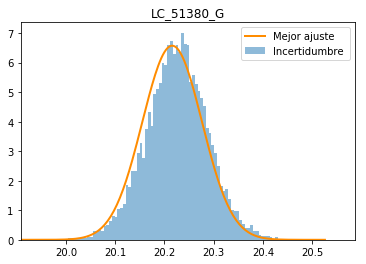

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_51380_G')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_G')

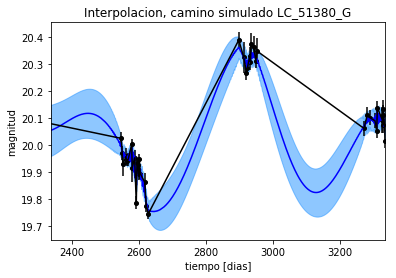

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_G')

Text(0.5,1,'Interpolacion, camino simulado LC_51380_G')

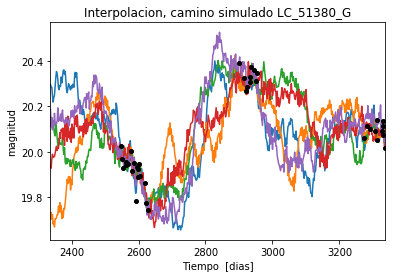

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_51380_G')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 294.635654379
Median: 0.0216115524844
Standard deviation: 0.152853587633
68% credibility interval: [ 0.00300824  0.10848678]
95% credibility interval: [  4.92892203e-04   6.01434848e-01]
99% credibility interval: [  3.35226908e-04   9.05625607e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 258.743601562
Median: 0.0168462037171
Standard deviation: 0.104981194226
68% credibility interval: [ 0.00187095  0.06812938]
95% credibility interval: [ 0.00042459  0.38147139]
99% credibility interval: [  3.21529930e-04   7.53612949e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 434.249886834
Median: 0.0710970710958
Standard de

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 562.153316028
Median: 109.28147904
Standard deviation: 2.44636407132
68% credibility interval: [ 106.4215871  111.4164918]
95% credibility interval: [ 103.51657224  112.6805135 ]
99% credibility interval: [ 101.50658898  113.47865516]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 304.603880559
Median: 0.915514152639
Standard deviation: 2.41278126444
68% credibility interval: [ 0.26560092  4.30427068]
95% credibility interval: [ 0.08329967  8.42522111]
99% credibility interval: [  0.02890075  12.0998905 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 684.155550061
Median: 3.65045601632
Standard deviation: 11.7560926284
68% credibility interval: [  0.99086418  20.73726454]
95% credibility interval: [  0.08124764

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1405.82281814
Median: 2.93822682693e-15
Standard deviation: 1.43886854811e+71
68% credibility interval: [  5.62114415e-63   2.48036987e+14]
95% credibility interval: [  5.24083127e-104   1.32007466e+048]
99% credibility interval: [  1.31317310e-107   3.50839366e+069]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 816.104576107
Median: 20.0565524289
Standard deviation: 0.0728849663469
68% credibility interval: [ 19.99902998  20.11682477]
95% credibility interval: [ 19.91308319  20.22227451]
99% credibility interval: [ 19.82933859  20.29862769]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 312.498647017
Median: 0.269296727749
Standard deviation: 0.257417737157
68% credibility interval: [ 0.11113414  0.69365119]
95% credibility interval: [ 0.         0.9053205]
99% credibility interval: [ 0.          1.03192015]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 312.498647017
Median: 0.269296727749
Standard deviation: 0.257417737157
68% credibility interval: [ 0.11113414  0.69365119]
95% credibility interval: [ 0.         0.9053205]
99% credibility interval: [ 0.          1.03192015]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 109.398887652
Median: 0.0
Standard deviation: 0.000705695724724
68% credibil

In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 312.498647017
Median: 0.269296727749
Standard deviation: 0.257417737157
68% credibility interval: [ 0.11113414  0.69365119]
95% credibility interval: [ 0.         0.9053205]
99% credibility interval: [ 0.          1.03192015]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 312.498647017
Median: 0.269296727749
Standard deviation: 0.257417737157
68% credibility interval: [ 0.11113414  0.69365119]
95% credibility interval: [ 0.         0.9053205]
99% credibility interval: [ 0.          1.03192015]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 109.398887652
Median: 0.0
Standard deviation: 0.000705695724724
68% credibil

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 562.153316028
Median: 109.28147904
Standard deviation: 2.44636407132
68% credibility interval: [ 106.4215871  111.4164918]
95% credibility interval: [ 103.51657224  112.6805135 ]
99% credibility interval: [ 101.50658898  113.47865516]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 492.829606793
Median: 0.029803822078
Standard deviation: 0.0221977643345
68% credibility interval: [ 0.01908222  0.05114049]
95% credibility interval: [ 0.01366765  0.08780922]
99% credibility interval: [ 0.01161215  0.13172493]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1060.77528992
Median: 1.07741056718
Standard deviation: 0.240882607247
68% credibility interval: [ 0.86939335  1.34107446]
95% credibility interval: [ 0.71878417  1.64939829]
99% credibility interval: [ 0.64494011  1.86582115]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 400.358594187
Median: 0.00954069282752
Standard deviation: 0.520457224318
68% credibility interval: [  1.76091685e-16   2.89191638e-01]
95% credibility interval: [  1.23518138e-50   1.75723381e+00]
99% credibility interval: [  2.44679413e-72   3.39631980e+00]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 294.635654379
Median: (-0.135789389035-1.18278816509j)
Standard deviation: 1.88105714467
68% credibility interval: [-0.68164254-1.96574742j -0.01890136-1.92168963j]
95% credibility interval: [ -3.77892660e+00+0.j          -3.09693305e-03-0.20683861j]
99% credibility interval: [ -5.69021351e+00+0.j          -2.10629278e-03-5.39291691j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 258.743601562
Median: (-0.105847819677+1.93702507515j)
Standard deviation: 1.74673616676
68% credibility interval: [-0.42806952+1.53628843j -0.01175553+1.02406295j]
95% credibility interval: [-2.39685541+0.84579088j -0.00266776+1.04977308j]
99% credibility interval: [ -4.73508981e+00+2.35753716j  -2.02023213e-03+4.34553091j]
Posterior summar